In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

In [58]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dims=[]
X = np.array([[0,1],[1,0]])
for h in np.arange(0.,1,0.01):   
    
    h1 = 0
    h2 = h
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*X)).reshape([4,])
    #B[0,0] =(np.array([[0,0],[0,1]])).reshape([4,])
    #B[0,0] =(np.random.rand(2,2)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS.svd_threshold =1e-11
        

    trans = funcs.single_trans(h1=0,h2=h,u1="I",u2="I")
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,30)
    MPS_power.update(0,400)
    #print(MPS.chi[0])
    eigs.append(MPS_power.E_history[-1])


    
    T1 = funcs.single_T(h1,h2)
    MPO3 = iMPS.iMPO()
    MPO3.construct_from_tensor_list([T1])
    
    
    strap1 = iMPS.strap(MPS,MPO3,MPS)
    lam1= strap1.calculate_eig()
    
    T2 = funcs.single_T(h1,h2,"I","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T2])
    
    
    strap2 = iMPS.strap(MPS,MPO4,MPS)
    lam2 = strap2.calculate_eig()
    
    
    T3 = funcs.single_T(h1,h2,"X","I")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap3 = iMPS.strap(MPS,MPO4,MPS)
    lam3 = strap3.calculate_eig()
    
    T3 = funcs.single_T(h1,h2,"X","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    
    dims.append(MPS.chi[0])
   
    lam1s.append(lam1)
    lam2s.append(lam2)
    lam3s.append(lam3)
    lam4s.append(lam4)

KeyError: 0.0

[[1. 0.]
 [0. 1.]]


In [48]:
lam1s = np.array(lam1s)
lam2s = np.array(lam2s)
lam3s = np.array(lam3s)
lam4s = np.array(lam4s)

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


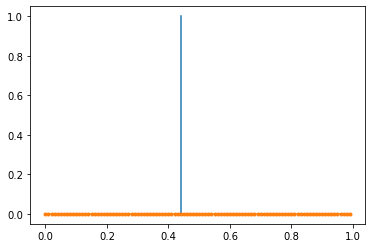

In [57]:
L=1
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,1])
pyplot.plot(np.arange(0.,1,0.01),(lam1s**L+lam3s**L-lam4s**L-lam2s**L)/(lam1s**L+lam3s**L+lam4s**L+lam2s**L),'.-')


/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


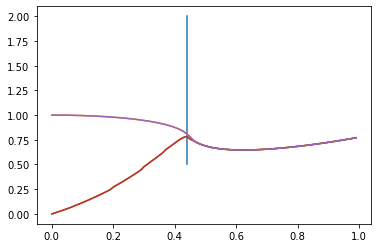

In [50]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0.5,2])
pyplot.plot(np.arange(0,1,0.01),lam1s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam2s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam3s)
pyplot.plot(np.arange(0,1,0.01),lam2s)
pyplot.plot(np.arange(0,1,0.01),lam3s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam2s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam3s)
pyplot.plot(np.arange(0,1,0.01),lam4s)


In [45]:
MPS_power.E_history

[4.690406111235953,
 7.198794730543421,
 7.2437997877295714,
 7.245421985633077,
 7.245478418352164,
 7.245480350395132,
 7.245480415962588,
 7.245480418176051,
 7.245480418250495,
 7.245480418253036,
 7.245480418253038,
 7.245480418253241,
 7.245480418253087,
 7.245480418253093]

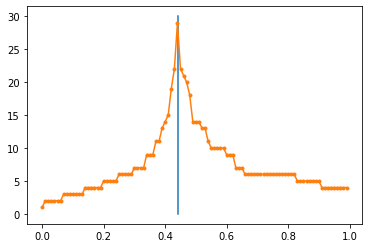

In [42]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,30])
pyplot.plot(np.arange(0.,1,0.01),dims,'.-')

correlation function


In [9]:
np.random.seed(0)

A = np.zeros([3,3,2],dtype = 'complex')

B = np.zeros([3,3,2],dtype = 'complex')

A = A+np.random.random([3,3,2])

A = A+np.random.random([3,3,2])*1j


B = B+np.random.random([3,3,2])

B = B+np.random.random([3,3,2])*1j

x = np.array([[0,1],[1,0]])

x = x.reshape([1,1,2,2])

trans1 = funcs.col_contract343(A,x,A)@funcs.col_contract343(B,x,B)

trans2 = funcs.col_contract343(A,x,A)@funcs.col_contract343(B,x,B)

trans = funcs.col_contract33(A,A)@funcs.col_contract33(B,B)

lam,v = np.linalg.eig(trans.transpose()) 
index = lam.argsort()[::-1]
Gl = v[:,index[0]]

lam,v = np.linalg.eig(trans) 
index = lam.argsort()[::-1]
Gr = v[:,index[0]]

cor = Gl@trans1@trans@trans@trans2@Gr/(Gl@trans@trans@trans@trans@Gr)
print(cor)

(0.5449094050399506+1.567530647289416e-17j)


In [10]:
MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([A,B])


trans1 = funcs.col_contract343(MPS.B[0],x,MPS.B[0])@funcs.col_contract343(MPS.B[1],x,MPS.B[1])

trans2 = funcs.col_contract343(MPS.B[0],x,MPS.B[0])@funcs.col_contract343(MPS.B[1],x,MPS.B[1])

trans = funcs.col_contract33(MPS.B[0],MPS.B[0])@funcs.col_contract33(MPS.B[1],MPS.B[1])

lam,v = np.linalg.eig(trans.transpose()) 
index = lam.argsort()[::-1]
Gl = v[:,index[0]]

lam,v = np.linalg.eig(trans) 
index = lam.argsort()[::-1]
Gr = v[:,index[0]]

cor = Gl@trans1@trans@trans@trans2@Gr/(Gl@trans@trans@trans@trans@Gr)
print(cor)

(0.5449094050399486+2.622467922638606e-19j)


In [11]:
M = np.zeros([9,9],dtype='complex')
M += np.random.random([9,9])
M = M+M.transpose()

M += np.random.random([9,9])*1j
M = M+M.transpose().conj()


funcs.is_hermitian_upto_a_phase(M)

True

In [12]:
np.random.seed(0)
A = np.random.normal(0,1,[9,9])
A = A@A.transpose()
X = funcs.sqrthm(A,1e-10)
assert (np.linalg.norm(X@X.transpose().conj()-A))<1e-5

In [13]:
np.random.seed(0)
A = np.random.random([3,3,4])
A = A+np.transpose(A,[1,0,2])
B = np.random.random([3,3,4])
B = B+np.transpose(B,[1,0,2])

C = np.random.random([3,3,4])
MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([A,B,C])

In [14]:
trans = MPS.transfer_matrix()
isinstance(trans,linalg.LinearOperator)
#isinstance(trans,np.ndarray)

True

In [15]:

trans = MPS.transfer_matrix()
vr = np.eye(MPS.chi[0])
vr = np.reshape(vr,[MPS.chi[0]**2,])
V = trans.dot(vr)
assert np.linalg.norm(V-vr*V[0]) <=1e-12, f'not right canonical, error = {np.linalg.norm(V-vr)}'


vl = MPS.s[0]@MPS.s[0].conj().transpose()
vl = np.reshape(vl,[MPS.chi[0]**2,])
V = trans.rmatvec(vl)
  
assert np.linalg.norm(V-vl*V[0]/vl[0]) <=1e-12, f'not left canonical, error = {np.linalg.norm(V-vl)}'
            

In [16]:
gammaB = MPS.B[1]
transB = funcs.col_contract33(gammaB,gammaB)
vr = np.eye(MPS.chi[0])
vr = np.reshape(vr,[MPS.chi[0]**2,])
V = transB.dot(vr)
assert np.linalg.norm(V-vr*V[0]) <=1e-12, f'not right canonical, error = {np.linalg.norm(V-vr)}'

gammaA = MPS.B[0]
transA = funcs.col_contract33(gammaA,gammaA)
vl = MPS.s[0]@MPS.s[0].conj().transpose()
vl = np.reshape(vl,[MPS.chi[0]**2,])
V = vl@transA
  
vl2 = MPS.s[1]@MPS.s[1].conj().transpose()
vl2 = np.reshape(vl2,[MPS.chi[1]**2,])
assert np.linalg.norm(V-vl2*V[0]/vl2[0]) <=1e-12, f'not left canonical, error = {np.linalg.norm(V-vr)}'

Test on Toric code

In [17]:
eigs1=[]
X = np.array([[0,1],[1,0]])
for h in np.arange(0.7,0.71,0.02):   
    
    B = np.zeros([1,1,4])
    B[0,0] =(np.array([[np.exp(h),0],[0,np.exp(-h)]])).reshape([4,])
    #B[0,0] =(np.array([[0,0],[0,1]])).reshape([4,])
    #B[0,0] =(np.random.rand(2,2)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS.svd_threshold =1e-10
        

    trans = funcs.single_trans(h,"I","I")
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,20)
    MPS_power.update(0,200)
    #print(MPS.chi[0])
    #eigs1.append(MPS_power.E_history[-1])
    
eigs2=[]

for h in np.arange(0.7,0.71,0.02):   
    
    B = np.zeros([1,1,4])
    B[0,0] =(X@np.array([[np.exp(h),0],[0,np.exp(-h)]])@X).reshape([4,])
    #B[0,0] =(np.array([[0,1],[0,0]])).reshape([4,])
    #B[0,0] =(np.random.rand(2,2)).reshape([4,])
    MPS2 = iMPS.iMPS()
    MPS2.construct_from_tensor_list([B])
    MPS2.svd_threshold =1e-10
        
     
    trans = funcs.single_trans(h,"I","I")
    MPO2 = iMPS.iMPO()
    MPO2.construct_from_tensor_list([trans])
    MPS_power2 = iMPS.MPS_power_method(MPS2,MPO2,20)
    MPS_power2.update(0,200)
    #print(MPS.chi[0])
    #eigs2.append(MPS_power2.E_history[-1])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
MPS_power2.E_history

[4.08743804075024,
 4.073755374389336,
 4.072503597133328,
 4.072372632351526,
 4.072357435708314,
 4.07235554441345,
 4.07235529740761,
 4.072355264009026,
 4.072355259373853,
 4.072355258717455,
 4.072355258623007,
 4.072355258609147,
 4.072355258607166]

In [ ]:
eigs1=[]
X = np.array([[0,1],[1,0]])
B = np.zeros([1,1,4])
h=0.5
B[0,0] =(np.array([[np.exp(h),0],[0,np.exp(-h)]])).reshape([4,])
#B[0,0] =(np.array([[0,1],[1,0]])).reshape([4,])
#B[0,0] =(np.random.rand(2,2)).reshape([4,])
print(B)
MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([B])
MPS.svd_threshold =1e-10
        

trans = funcs.single_trans(h,"I","I")
    
MPO = iMPS.iMPO()
MPO.construct_from_tensor_list([trans])
MPS_power = iMPS.MPS_power_method(MPS,MPO,20)
MPS_power.update(0,200)

[[[0. 1. 1. 0.]]]


In [ ]:
MPS.B[0]

array([[[0.        +0.00000000e+00j, 0.70710678+2.47930871e-16j,
         0.70710678+2.47930871e-16j, 0.        +0.00000000e+00j]]])

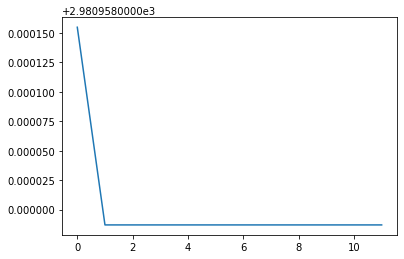

In [ ]:
pyplot.plot(MPS_power.E_history)

In [ ]:
MPS.init_norm

1.0

In [ ]:
T1 = funcs.single_T(h)
#T1  =np.zeros([1,1,4,4])
#T1[0,0] = np.eye(4)
#T1[0,0] = np.kron(X,X)
MPO3 = iMPS.iMPO()
MPO3.construct_from_tensor_list([T1])

ez = np.array([[np.exp(h),0],[0,np.exp(-h)]])

In [ ]:
T1 = funcs.single_T(h)
T1 = T1.reshape([4,4,4,2,2])

T1 = np.tensordot(T1,ez,([4],[0]))
T1 = np.trace(T1,axis1=3,axis2=4)
T1 = T1.reshape([4,4,2,2])
T1 = np.tensordot(T1,ez,([3],[0]))

T1 = np.trace(T1,axis1=2,axis2=3)
print(T1)

[[4.48168907 0.         0.         0.22313016]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [1.64872127 0.         0.         0.60653066]]


In [ ]:
T1 = funcs.single_T(h)

ez = np.array([[np.exp(-h),0],[0,np.exp(h)]])

T1 = T1.reshape([4,4,4,2,2])

T1 = np.tensordot(T1,ez,([4],[0]))
T1 = np.trace(T1,axis1=3,axis2=4)
T1 = T1.reshape([4,4,2,2])
T1 = np.tensordot(T1,ez,([3],[0]))

T1 = np.trace(T1,axis1=2,axis2=3)
print(T1)

[[0.60653066 0.         0.         1.64872127]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.22313016 0.         0.         4.48168907]]


In [ ]:
strap1 = iMPS.strap(MPS,MPO3,MPS)
strap1.calculate_eig()

(1.8902059444102965+9.974659986866641e-17j)

In [ ]:
strap2 = iMPS.strap(MPS2,MPO3,MPS)
strap2.calculate_eig()

(0.7547606263117412+5.199400257106832e-07j)

In [ ]:
1.1063538946996045/1.4108211351969062

0.7841914663017806

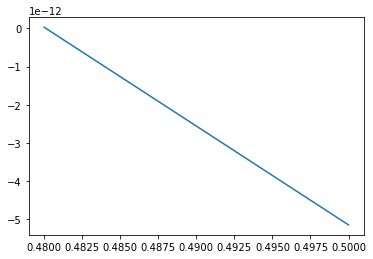

In [ ]:
pyplot.plot(np.arange(0.48,0.5,0.02),np.array(eigs1)-np.array(eigs2))
#pyplot.plot(np.arange(0.,0.5,0.02),np.array(eigs2))
#pyplot.plot(np.arange(0.,0.3,0.01),np.array(eigs2))
#pyplot.plot(np.arange(0.,0.5,0.05),eigs2)

In [ ]:
MPS.chi[0]

9

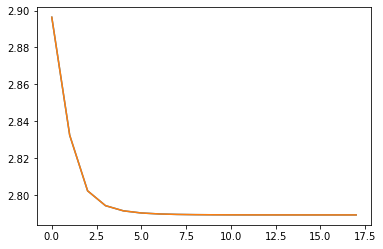

In [ ]:
pyplot.plot(np.array(MPS_power.E_history))
pyplot.plot(MPS_power2.E_history)

In [ ]:
h=0.1
X = np.array([[0,1],[1,0]])
B = np.zeros([1,1,4])
B[0,0] =(np.array([[np.exp(h),0],[0,np.exp(-h)]])).reshape([4,])
MPS1 = iMPS.iMPS()
MPS1.construct_from_tensor_list([B])
MPS1.svd_threshold =1e-30
        
     
trans = funcs.single_trans(h)
MPO1 = iMPS.iMPO()
MPO1.construct_from_tensor_list([trans])
MPS_power1 = iMPS.MPS_power_method(MPS1,MPO1,20)
MPS_power1.update(0,1)


In [ ]:
h=0.1
B = np.zeros([1,1,4])
B[0,0] =(np.array([[np.exp(h),0],[0,np.exp(-h)]])@X).reshape([4,])
MPS2 = iMPS.iMPS()
MPS2.construct_from_tensor_list([B])
MPS2.svd_threshold =1e-30
        
     
trans = funcs.single_trans(h)
MPO2 = iMPS.iMPO()
MPO2.construct_from_tensor_list([trans])
MPS_power2 = iMPS.MPS_power_method(MPS2,MPO2,20)
MPS_power2.update(0,1)

In [ ]:
MPS_power1.update(0,1)
MPS_power2.update(0,1)

In [ ]:
T1

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.36787944, 0.        , 0.        , 1.        ]])

In [ ]:
T1 = trans[0,3,:,:]
print(np.linalg.eig(T1))

(array([1., 0., 0., 0.]), array([[ 0.        ,  0.9385079 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        , -0.34525776,  0.        ,  0.        ]]))


In [ ]:
np.linalg.norm(np.tensordot(MPS2.B[0].reshape([MPS2.chi[0],MPS2.chi[0],2,2]),X,([3],[0])).reshape([MPS2.chi[0],MPS2.chi[0],4])-MPS1.B[0])

2.02894544937153

In [ ]:
(((np.tensordot(MPS2.B[0].reshape([MPS2.chi[0],MPS2.chi[0],2,2]),X,([3],[0])).reshape([MPS2.chi[0],MPS2.chi[0],4])).reshape([9,4])))

array([[ 7.08149802e-01+1.06303855e-14j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  7.06061505e-01-1.02973186e-14j],
       [-7.09260923e-04-3.22441726e-16j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  7.11358247e-04+3.33066907e-16j],
       [-6.61557824e-09+9.39146217e-16j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  6.63569339e-09-9.42914334e-16j],
       [-7.02344145e-01+1.04611875e-10j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  7.04421570e-01+1.01985309e-10j],
       [ 7.17151405e-02+9.52201512e-12j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  7.19329340e-02-1.18255510e-11j],
       [-6.40842743e-05+8.04378555e-12j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, -6.44344388e-05+1.01319633e-11j],
       [-1.40885941e-01-1.19407118e-07j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.000000

In [ ]:
MPS1.B[0].reshape([9,4])

array([[ 7.08149802e-01-8.69065481e-16j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  7.06061505e-01+8.72294009e-16j],
       [ 7.09260923e-04-1.08319773e-17j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, -7.11358247e-04+1.32273586e-17j],
       [ 6.61557836e-09+7.65249898e-17j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, -6.63569351e-09-7.70123843e-17j],
       [ 7.02344145e-01+8.56093819e-12j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, -7.04421570e-01+8.37535634e-12j],
       [ 7.17151405e-02-7.81424038e-13j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  7.19329339e-02+9.69379906e-13j],
       [-6.40842751e-05-6.59687375e-13j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, -6.44344382e-05-8.30947280e-13j],
       [ 1.40885873e-01-9.79316514e-09j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.000000

In [ ]:
print(np.linalg.norm(MPS2.gram_matrix('right')-MPS1.gram_matrix('right')))
print(np.linalg.norm(MPS2.gram_matrix('right')+MPS1.gram_matrix('right')))

6.815651392668103e-13
2.0


In [ ]:
MPS2.gram_matrix('right')-MPS1.gram_matrix('right')

array([[ 4.81614748e-13+0.00000000e+00j, -2.14256300e-14+8.83446109e-17j],
       [-2.14256300e-14-8.83446109e-17j, -4.81503726e-13+0.00000000e+00j]])

In [ ]:
MPS2.gram_matrix('left')-MPS1.gram_matrix('left')

array([[ 1.11022302e-16+0.00000000e+00j, -3.61467409e-17-2.73920309e-17j],
       [-3.61467409e-17+2.73920309e-17j, -1.68649448e-16+0.00000000e+00j]])

In [ ]:
MPS1.transfer_matrix().dot(np.eye(4))

array([[ 9.99999063e-01+0.j,  2.27062772e-09+0.j,  2.27062772e-09+0.j,
         9.37066145e-07+0.j],
       [ 2.33423914e-06+0.j,  9.84323447e-02+0.j,  9.63317975e-04+0.j,
        -2.33423917e-06+0.j],
       [ 2.33423914e-06+0.j,  9.63317975e-04+0.j,  9.84323447e-02+0.j,
        -2.33423917e-06+0.j],
       [ 9.90305249e-01+0.j, -2.39963269e-03+0.j, -2.39963269e-03+0.j,
         9.69475128e-03+0.j]])

In [ ]:
MPS2.transfer_matrix().dot(np.eye(4))

array([[ 9.99999063e-01+0.j, -2.27062772e-09+0.j, -2.27062772e-09+0.j,
         9.37066145e-07+0.j],
       [-2.33423914e-06+0.j,  9.84323447e-02+0.j,  9.63317975e-04+0.j,
         2.33423917e-06+0.j],
       [-2.33423914e-06+0.j,  9.63317975e-04+0.j,  9.84323447e-02+0.j,
         2.33423917e-06+0.j],
       [ 9.90305249e-01+0.j,  2.39963269e-03+0.j,  2.39963269e-03+0.j,
         9.69475128e-03+0.j]])

In [ ]:
trans = MPS1.transfer_matrix()
vr = np.eye(MPS1.chi[0])
vr = np.reshape(vr,[MPS1.chi[0]**2,])
V = trans.dot(vr)
assert np.linalg.norm(V-vr*V[0]) 

In [ ]:
np.tensordot(MPS2.B[0].reshape([MPS2.chi[0],MPS2.chi[0],2,2]),X,([3],[0])).reshape([MPS2.chi[0],MPS2.chi[0],4])-MPS1.B[0]

array([[[ 0.00000000e+00+0.j, -1.11022302e-16+0.j,  0.00000000e+00+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j, -1.38548952e-03+0.j,  1.35228820e-03+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  2.28839875e-25+0.j, -2.73777924e-25+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  2.92928029e-24+0.j, -2.98363658e-24+0.j,
          0.00000000e+00+0.j]],

       [[ 0.00000000e+00+0.j, -1.42430389e+00+0.j,  1.39017244e+00+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j, -5.55111512e-17+0.j,  6.93889390e-17+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  2.58202570e-23+0.j,  2.52395833e-23+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  3.04290710e-22+0.j,  2.96980357e-22+0.j,
          0.00000000e+00+0.j]],

       [[ 0.00000000e+00+0.j, -2.15091133e-07+0.j,  1.29621593e-07+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  1.35158808e-08+0.j,  1.32707704e-08+0.

In [ ]:
MPS1.B[0]

array([[[ 0.00000000e+00+0.j,  6.98478258e-01+0.j,  7.15630621e-01+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  6.92744758e-04+0.j, -6.76144101e-04+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j, -2.28839875e-25+0.j,  2.73777924e-25+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j, -2.92928029e-24+0.j,  2.98363658e-24+0.j,
          0.00000000e+00+0.j]],

       [[ 0.00000000e+00+0.j,  7.12151945e-01+0.j, -6.95086222e-01+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  7.04787189e-02+0.j,  6.87568284e-02+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j, -2.58202570e-23+0.j, -2.52395833e-23+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j, -3.04290710e-22+0.j, -2.96980357e-22+0.j,
          0.00000000e+00+0.j]],

       [[ 0.00000000e+00+0.j,  6.10229250e-08+0.j,  2.45765302e-08+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  1.91877971e-09+0.j,  1.79049817e-09+0.

In [ ]:
B1 = np.zeros([1,1,4])
B1[0,0] =(X@np.array([[np.exp(h),0],[0,np.exp(-h)]])).reshape([4,])
B2 = np.zeros([1,1,4])
B2[0,0] =(np.array([[np.exp(h),0],[0,np.exp(-h)]])).reshape([4,])